# Data Preprocessing:

# Load Data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv(r'C:\Users\Mandar\Downloads\Sales.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Feature engineering:

# Data cleaning:

It is a method in data science which helps in preparing the data according to business need.

Handling Nan values: No need to Handling Nan value.

In [2]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [3]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales       -0.073739
dtype: float64

# Visualizing the relationship

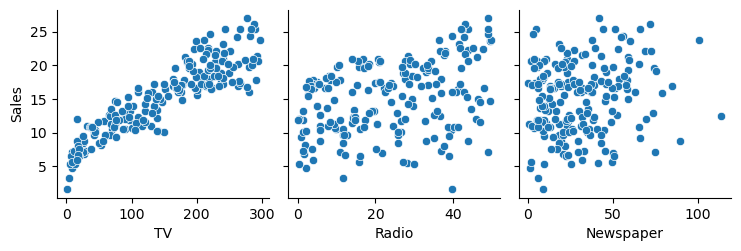

In [5]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

In [6]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


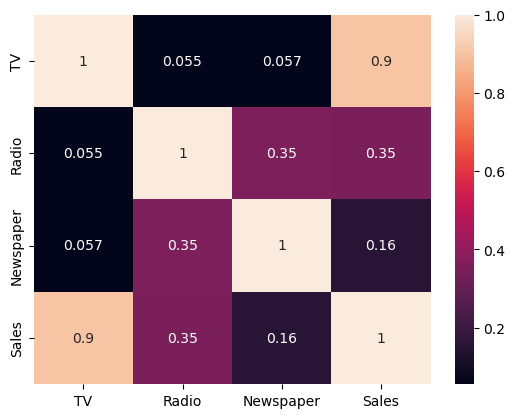

In [7]:
sns.heatmap(df.corr(), annot=True );

C:\Users\Mandar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mandar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mandar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


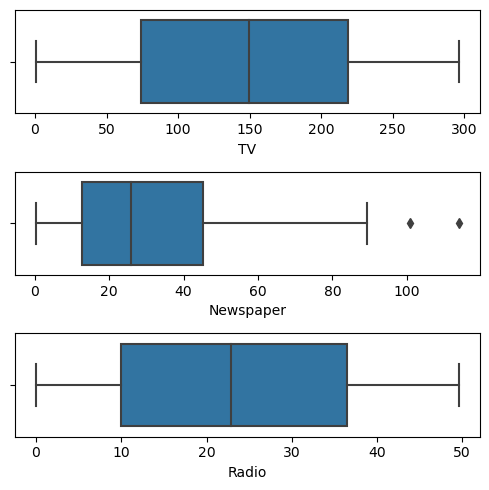

In [8]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

# Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def encode(df):
    for col in df.columns:
        if df[col].dtypes=="object":
            df[col]=le.fit_transform(df[col])
    return df
df=encode(df)

# Remove Skewness

In [13]:
from sklearn.preprocessing import power_transform
def rem_skew(df):
    feature_df=df.drop(["Sales"],axis=1)
    target_df=df[["Sales"]]
    array_data=power_transform(feature_df,method="yeo-johnson")
    feature_df=pd.DataFrame(array_data,columns=feature_df.columns)
    df=pd.concat([feature_df,target_df],axis=1)
    return df
df=rem_skew(df)

# Standard Scalling

In [14]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
sc=StandardScaler()
def scale_ss(dataframe):
    list_col_object=[col for col in list(dataframe.columns) if dataframe[col].dtypes=="object"]
    list_col_num=[col for col in list(dataframe.columns) if dataframe[col].dtypes!="object"]
    df_num=dataframe[list_col_num]
    array_data=sc.fit_transform(df_num)
    df_num=pd.DataFrame(array_data,columns=df_num.columns)
    df=pd.concat([df_num,dataframe[list_col_object]],axis=1)
    return df
df_scaled_standard_scaler=scale_ss(df)
df_scaled_standard_scaler

,TV,Radio,Newspaper,Sales
0,0.948674,0.962247,1.514335,1.322319
1,-1.191314,1.040179,0.787683,-0.897515
2,-1.647757,1.370710,1.516998,-0.593948
3,0.141020,1.142387,1.214656,0.259834
4,0.452715,-0.748651,1.211704,0.525455
...,...,...,...,...
195,-1.287908,-1.431436,-0.682576,-1.428757
196,-0.520949,-1.297017,-1.142011,-0.214489
197,0.413091,-0.875492,-1.313050,-0.062706
198,1.455843,1.177722,1.433350,1.967398


In [9]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(-1, 1))
def scale_mms(dataframe):
    list_col_object=[col for col in list(dataframe.columns) if dataframe[col].dtypes=="object"]
    list_col_num=[col for col in list(dataframe.columns) if dataframe[col].dtypes!="object"]
    df_num=dataframe[list_col_num]
    df_obj=dataframe[list_col_object]
    array_data=mms.fit_transform(df_num)
    df_num=pd.DataFrame(array_data,columns=df_num.columns)
    df=pd.concat([df_num,df_obj],axis=1)
    return df
dataframe_mms_scaled=scale_mms(df)
dataframe_mms_scaled

,TV,Radio,Newspaper,Sales
0,0.654302,0.667829,0.581761,0.614173
1,-0.530128,0.712007,0.282367,-0.307087
2,-0.782758,0.899379,0.582858,-0.181102
3,0.207285,0.769947,0.458288,0.173228
4,0.379801,-0.302048,0.457071,0.283465
...,...,...,...,...
195,-0.583590,-0.689107,-0.323405,-0.527559
196,-0.159098,-0.612907,-0.512701,-0.023622
197,0.357870,-0.373952,-0.583172,0.039370
198,0.935007,0.789977,0.548394,0.881890


# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
def split_data(df):
    feature_df=df.drop(["Sales"],axis=1)
    target_df=df[["Sales"]]
    x_train,x_test,y_train,y_test=train_test_split(feature_df,target_df,random_state=0,test_size=0.2,shuffle=True)
    return x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test=split_data(df)

# Model Training

### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [17]:
from sklearn.metrics import r2_score
print(f"The accuracy of the regression model is {r2_score(y_train,lr.predict(x_train))*100}%")
print(f"The accuracy of the regression model is {r2_score(y_test,lr.predict(x_test))*100}%")

The accuracy of the regression model is 92.13698423668765%
The accuracy of the regression model is 88.80057904603214%


### Random Forest Regression

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rfr=RandomForestRegressor()
def model_validation_rfr(x_train,x_test,y_train,y_test):
    rfr.fit(x_train,y_train)
    predicted_tr=rfr.predict(x_train)
    predicted_ts=rfr.predict(x_test)
    print(f'''
    The accuracy of the Random Forest Regressor model on the training data is {r2_score(y_train,predicted_tr)*100}% and 
    on the testing data is {r2_score(y_test,predicted_ts)*100}%.''')
model_validation_rfr(x_train,x_test,y_train,y_test)

C:\Users\Mandar\AppData\Local\Temp\ipykernel_2384\1993926707.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train,y_train)



    The accuracy of the Random Forest Regressor model on the training data is 99.26583679797211% and 
    on the testing data is 94.67606514451091%.


### Gradient Boosting Regressor

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
def model_validation(x_train,x_test,y_train,y_test):
    gbr=GradientBoostingRegressor()
    gbr.fit(x_train,y_train)
    predicted_tr=gbr.predict(x_train)
    predicted_ts=gbr.predict(x_test)
    return (f'''The accuracy of the gbr with default for training data is {r2_score(y_train,predicted_tr)*100} %.
    The accuracy of the gbr with default for testing data is {r2_score(y_test,predicted_ts)*100} %.
    ''')
model_validation(x_train,x_test,y_train,y_test)

C:\Users\Mandar\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'The accuracy of the gbr with default for training data is 99.48003840955617 %.\n    The accuracy of the gbr with default for testing data is 94.17914955473996 %.\n    '

# Others metrics for validating the model

In [20]:
# mean squared error
from sklearn.metrics import mean_squared_error
def test_mean_squared_error(x_test,y_test):
    expected_data=y_test
    actual=lr.predict(x_test)
    return f"The mean_squared_error of the model is {mean_squared_error(actual,expected_data)}"
test_mean_squared_error(x_test,y_test)

'The mean_squared_error of the model is 3.738153925436346'

In [21]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
def test_mean_absolute_error(x_test,y_test):
    expected_data=y_test
    actual=lr.predict(x_test)
    return f"The mean_absolute_error of the model is {mean_absolute_error(actual,expected_data)}"
test_mean_absolute_error(x_test,y_test)

'The mean_absolute_error of the model is 1.388473975941944'

In [22]:
# root mean square error
from sklearn.metrics import mean_squared_error
import numpy as np
def test_root_mean_absolute_error(x_test,y_test):
    expected_data=y_test
    actual=lr.predict(x_test)
    return f"The mean_absolute_error of the model is {np.sqrt(mean_absolute_error(actual,expected_data))}"
test_root_mean_absolute_error(x_test,y_test)

'The mean_absolute_error of the model is 1.178335256173702'

# Model Training using Bayesian Regression:

In [23]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge().fit(x_train, y_train)

br_train_pred = br.predict(x_train)
br_test_pred = br.predict(x_test)


br_train_mse = mean_squared_error(y_train, br_train_pred)
br_test_mse = mean_squared_error(y_test, br_test_pred)


print('MSE train data: {:.5}, MSE test data: {:.5}'.format(br_train_mse, br_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(br_train_mse)), 
    np.sqrt(np.absolute(br_train_mse))))
                                                               
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, br_train_pred),
    r2_score(y_test, br_test_pred)))

MSE train data: 2.0544, MSE test data: 3.7421
RMSE train data: 1.4333, RMSE test data: 1.4333
R2 train data: 0.92137, R2 test data: 0.88789


C:\Users\Mandar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
